# **DIVE INTO CODE COURSE**
## **Sprint Machine Learning Scratch SVM**
**Student**: Doan Anh Tien<br>
**ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

### **[Problem 1] [Problem 2] [Problem 3] [Problem 4]**

In the SVM, soft margin enables us to classify classes with a few of accepted misclassifications, whereas the hard margin algorithm will contains no misclassification with its Lagrange multipliers mechanism.

**Data Preparation**

The target versicolor will be labeled as class 1, and the target virginica will be labeled as -1.

In [240]:
from sklearn.model_selection import train_test_split

In [242]:
# Artificial dataset from Sprint 1

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X_set1 = np.concatenate([f0, f1])
y_set1 = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [244]:
X_set1_train, X_set1_val, y_set1_train, y_set1_val = train_test_split(X_set1, y_set1, train_size=0.8)
print("Train dataset -- Rows: {}, Columns: {}".format(X_set1_train.shape[0], X_set1_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(X_set1_val.shape[0], X_set1_val.shape[1]))

Train dataset -- Rows: 400, Columns: 2
Test dataset -- Rows: 100, Columns: 2


In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_set1_train = sc.fit_transform(X_set1_train)
X_set1_val = sc.fit_transform(X_set1_val)

**Kernel Function (Linear)**

In [254]:
def _kernel_function(X1, X2, gamma=1, theta=0, d=1):
        """
        Compute a linear kernal function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          First feature vector

        X : The following forms of ndarray, shape (n_samples, n_features)
          Second feature vector

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result kernel function

        """
        
        kernel = (gamma*np.dot(X1, X2.T) + theta)**d 

        return kernel

**Test with some train dataset**

In [255]:
kernel_temp = _kernel_function(np.array(X_set1_train)[0], np.array(X_set1_train)[1])
print(kernel_temp)

-1.3549779591931717


**Larange Steepest Descent**

In [260]:
def _lambda_steepest_descent(X, y, lr):
        """
        Calculate the larange multiplier using its hypothesis function
        Parameters
        ----------
        X: The following form of ndarray, shape (n_samples, n_features)
            Features of training data
        
        y: The following form of ndarray, shape(n_samples,)
            Label for value of training data
        
        Returns
        -------
        lambda_val: The following form of ndarray, shape (n_samples, 1)
            Estimated larange multiplier value
        """
        lambda_val = np.random.randn(len(X))

        for i in range(len(X)):
            update_val = np.dot(lambda_val * y[i] * y.T, _kernel_function(X[i], X))
            lambda_val[i] += lr * (1 - update_val)
            lambda_val = np.where(lambda_val >=0, lambda_val, 0)

        return lambda_val

**Test with some dataset**

In [265]:
lambda_test = _lambda_steepest_descent(X_set1_train, y_set1_train, 0.01)
print("The lambda value greater than 0: \n {}".format(lambda_test[lambda_test > 0]))

The lambda value greater than 0: 
 [1.54896485 0.15008535 0.74086269 0.446815   0.29763153 0.08756871
 0.77283277 0.14645183 1.17439712 0.45735607 1.90015196 0.79773401
 0.27281834 0.03845443 1.63273349 0.59458918 0.63617165 0.06460533
 0.25521048 0.55956666 0.1253038  0.41133135 0.31617518 1.32910426
 0.443659   0.42976745 0.49068751 1.28604554 1.25811766 0.12943568
 0.49157455 0.48189544 0.09302082 0.78243682 1.79406707 0.23369524
 0.04992054 0.72867314 0.83273806 0.04185001 1.40625798 0.69122339
 0.143129   2.1570087  0.45289292 0.02285265 1.47034355 0.44916449
 1.08169215]


**Support Vector Determination**

In [266]:
def get_support_vector(X, Y, lambda_val, threshold):
        
        """
        Get the support vectors that satisfy with the threshhold

        """
        index_support_vectors = np.where(lambda_val > threshold)
        lambda_sv = lambda_val[lambda_val > threshold]
        X_sv = X[lambda_val > threshold]
        Y_sv = Y[lambda_val > threshold]
        n_support_vectors = len(X_sv)

        return X_sv, Y_sv, lambda_sv

In [267]:
X_sv_test, Y_sv_test, lambda_sv_test = get_support_vector(X_set1_train, y_set1_train, lambda_test, 1e-3)

In [275]:
for i in range (X_sv_test.shape[0]):
  print("Support vector X: {} -- Suport vector label: {} -- Suport vector lambda: {}".format(np.around(X_sv_test[i],2), Y_sv_test[i], lambda_sv_test[i]))

Support vector X: [ 0.59 -0.57] -- Suport vector label: -1 -- Suport vector lambda: 1.5489648451357485
Support vector X: [0.06 1.3 ] -- Suport vector label: 1 -- Suport vector lambda: 0.15008534783060545
Support vector X: [ 1.63 -0.  ] -- Suport vector label: -1 -- Suport vector lambda: 0.7408626895787291
Support vector X: [ 0.35 -0.47] -- Suport vector label: -1 -- Suport vector lambda: 0.44681499782291667
Support vector X: [ 0.58 -0.9 ] -- Suport vector label: -1 -- Suport vector lambda: 0.2976315348962806
Support vector X: [ 1.48 -0.68] -- Suport vector label: -1 -- Suport vector lambda: 0.08756870922593896
Support vector X: [-1.65  0.4 ] -- Suport vector label: 1 -- Suport vector lambda: 0.772832773712099
Support vector X: [-0.22  0.98] -- Suport vector label: 1 -- Suport vector lambda: 0.14645183418597207
Support vector X: [ 0.8  -1.15] -- Suport vector label: -1 -- Suport vector lambda: 1.1743971157515376
Support vector X: [-0.09 -1.56] -- Suport vector label: -1 -- Suport vector

In [276]:
# Number of support vector
print("Number of support vector: {}".format(len(X_sv_test)))

Number of support vector: 49


**What if we change the threshhold?**

In [279]:
# Threshold parameters
threshold = [1e-5, 1e-4, 1e-3, 1e-2, 0.05, 0.1, 1, 5, 10]

for i, margin_threshold in enumerate(threshold):
    X_sv_test, Y_sv_test, lambda_sv_test = get_support_vector(X_set1_train, y_set1_train, lambda_test, margin_threshold)
    # Number of support vector
    print("Number of support vector: {}".format(len(X_sv_test)))


Number of support vector: 49
Number of support vector: 49
Number of support vector: 49
Number of support vector: 49
Number of support vector: 45
Number of support vector: 42
Number of support vector: 12
Number of support vector: 0
Number of support vector: 0


It seems like the larger the threshold becomes, the less number of support vectors appears.

**Estimation**

In [253]:
def predict(X, lambda_sv, X_sv, Y_sv):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = 0

        y_pred = np.dot(self.lambda_sv * self.Y_sv, self._kernel_function(X, self.X_sv).T)

        final_pred = np.where(y_pred >= 0, 1, -1)

        return final_pred

In [ ]:
y_test_pred = predict(X_set1_test, lambda_sv_test, X_sv_test, Y_sv_test)
print("The predicted labels: {}".format(y_test_pred))

The predicted labels: [-1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1
  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1
  1 -1  1 -1]


In [ ]:
print("Accuracy: {}".format(accuracy_score(y_set1_test, y_test_pred)))

Accuracy: 1.0


### **[Problem 5] [Problem 6] Learning - Estimation - Polynomial Kernel**

**SVM Class**

In [280]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lambda_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, gamma=1, d=1, theta=0, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr  
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta = theta
        self.d = d

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.X = X
        self.Y = y

        m, n = X.shape
        self.lambda_val = np.random.rand(m)

        for i in range(self.iter):
            final_lambda = self._lambda_steepest_descent(X, y)
            if verbose:
              if (i % 10 == 0):
                print("Iteration {}".format(i))
            

        self.get_support_vector()

      
    def _lambda_steepest_descent(self, X, y):
        """
        Calculate the larange multiplier using its hypothesis function
        Parameters
        ----------
        X: The following form of ndarray, shape (n_samples, n_features)
            Features of training data
        
        y: The following form of ndarray, shape(n_samples,)
            Label for value of training data
        
        Returns
        -------
        lambda_val: The following form of ndarray, shape (n_samples, 1)
            Estimated larange multiplier value
        """
  
        for i in range(len(X)):
            update_val = np.dot(self.lambda_val * y[i] * y.T, self._kernel_function(X[i], X))
            self.lambda_val[i] += self.lr * (1 - update_val)
            self.lambda_val = np.where(self.lambda_val >=0, self.lambda_val, 0)

        return self.lambda_val
        

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = np.dot(self.lambda_sv * self.Y_sv, self._kernel_function(X, self.X_sv).T)

        final_pred = np.where(y_pred >= 0, 1, -1)

        return final_pred

    def get_support_vector(self):
        
        """
        Get the support vectors that satisfy with the threshhold

        """
        
        self.index_support_vectors = np.where(self.lambda_val > self.threshold)
        self.lambda_sv = self.lambda_val[self.lambda_val > self.threshold]
        self.X_sv = self.X[self.lambda_val > self.threshold]
        self.Y_sv = self.Y[self.lambda_val > self.threshold]
        self.n_support_vectors = len(self.X_sv)

        return self.X_sv, self.Y_sv, self.lambda_sv
        

    def _kernel_function(self, X1, X2):
        """
        Compute a linear kernal function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          First feature vector

        X : The following forms of ndarray, shape (n_samples, n_features)
          Second feature vector

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result kernel function

        """
        if self.kernel == 'poly':
          self.gamma = 1
          self.theta = np.random.uniform(low=-1, high = 1, size=(1))
          self.d = 2
        
        # We use the same format for both lienar and poly for easier interpretion
        kernel = (self.gamma*np.dot(X1, X2.T) + self.theta)**self.d 

        return kernel

In [282]:
# Hyperparameters setting
iter = 100
lr = 0.01
verbose = True

scratch_svm_model = ScratchSVMClassifier(iter, lr, True)
scratch_svm_model.fit(X_set1_train, y_set1_train)

Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90


**Estimation**

In [284]:
# Use the predict for the predicted labels
y_pred = scratch_svm_model.predict(X_set1_val)

# Testing out the metrics
acc_score = accuracy_score(y_set1_val, y_pred)
prec_score = precision_score(y_set1_val, y_pred)
rec_score = recall_score(y_set1_val, y_pred)
f_score = f1_score(y_set1_val, y_pred)
conf_matrix = confusion_matrix(y_set1_val, y_pred)
print("Accuracy score: {}\n Precision score: {}\n Recall score: {}\n F1 score: {}\n Confusion matrix: \n{}".format(acc_score, prec_score, rec_score, f_score, conf_matrix))

Accuracy score: 1.0
 Precision score: 1.0
 Recall score: 1.0
 F1 score: 1.0
 Confusion matrix: 
[[46  0]
 [ 0 54]]


**Visualization of decision area**

**Using plot_decision_regions from mlxtend**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


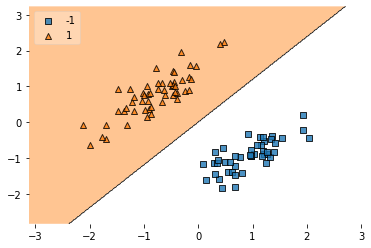

In [286]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_set1_val, y_set1_val, clf=scratch_svm_model,legend=2);

**Using decision region plotting scratch**

In [326]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['tab:red', 'tab:blue']
    contourf_color = ['darkred', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    c = plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=plt.cm.rainbow)
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='darkblue', linewidths=1.5, alpha=0.8)
    plt.colorbar(c)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=30, cmap=plt.cm.coolwarm, label=target_names[i], marker='o', edgecolors='k')


    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=30, label='support vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

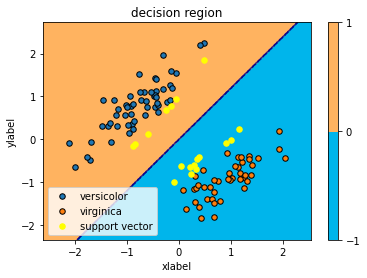

In [327]:
decision_region(X_set1_val, y_set1_val, scratch_svm_model);

**Polynomial Kernel (2D)**

**Modeling**

In [289]:
# Hyperparameters setting
iter = 100
lr = 0.01
verbose = True

scratch_svm_poly_model = ScratchSVMClassifier(iter, lr, kernel='poly', verbose=True)
scratch_svm_poly_model.fit(X_set1_train, y_set1_train)

Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90


**Predict**

In [290]:
# Use the predict for the predicted labels
y_poly_pred = scratch_svm_poly_model.predict(X_set1_val)

# Testing out the metrics
acc_score = accuracy_score(y_set1_val, y_poly_pred)
prec_score = precision_score(y_set1_val, y_poly_pred)
rec_score = recall_score(y_set1_val, y_poly_pred)
conf_matrix = confusion_matrix(y_set1_val, y_poly_pred)
print("Accuracy score: {}\n Precision score: {}\n Recall score: {}\n Confusion matrix: \n{}".format(acc_score, prec_score, rec_score, conf_matrix))

Accuracy score: 1.0
 Precision score: 1.0
 Recall score: 1.0
 Confusion matrix: 
[[46  0]
 [ 0 54]]


**Visualization of decision area**

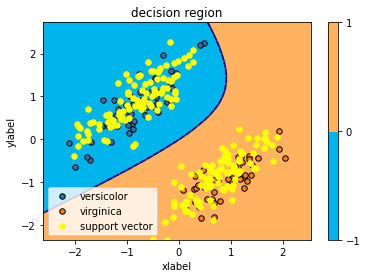

In [328]:
decision_region(X_set1_val, y_set1_val, scratch_svm_poly_model);